In [2]:
# ============================================================
# AI Representations Lab (PyTorch, Colab-Ready)
# FNN, CNN, RNN, LSTM, GRU, Transformer
# ============================================================

import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
torch.manual_seed(42)

# For nicer plots in Colab
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['axes.grid'] = True

# Utility: simple pretty printing
def print_header(title):
    print("\n" + "=" * 70)
    print(title)
    print("=" * 70 + "\n")


🔁 Re-running FNN demo...


FNN DEMO: Student Pass Probability from Study + Sleep

Inputs (study, sleep):
tensor([[0.1000, 0.9000],
        [0.9000, 0.3000],
        [0.8000, 0.8000],
        [0.3000, 0.2000]])

Hidden representations (3D feature vector per student):
tensor([[0.0000, 0.4638, 0.1237],
        [0.0000, 1.1080, 0.4208],
        [0.0000, 0.9072, 0.2794],
        [0.0000, 0.7805, 0.3329]], grad_fn=<ReluBackward0>)

Predicted pass probabilities:
tensor([0.5808, 0.6539, 0.6255, 0.6256], grad_fn=<SqueezeBackward0>)


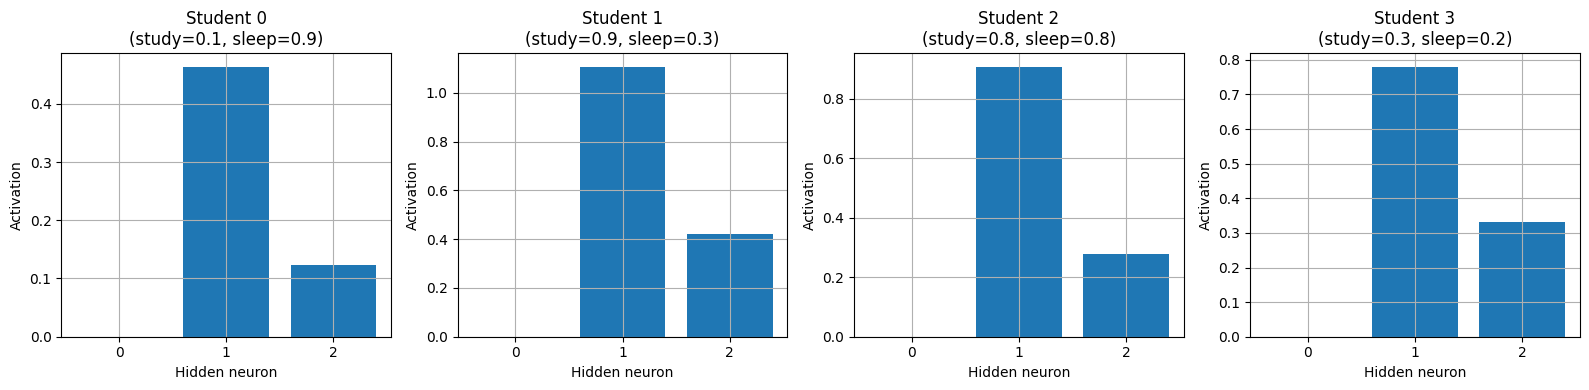

In [19]:
# ============================================================
# 1. FEEDFORWARD NEURAL NETWORK (FNN) DEMO
# ============================================================

class TinyFNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2, 3)   # representation layer
        self.fc2 = nn.Linear(3, 1)   # output

    def forward(self, x, return_hidden=False):
        h = F.relu(self.fc1(x))
        y = torch.sigmoid(self.fc2(h))
        if return_hidden:
            return y, h
        return y


def run_fnn_demo():
    print_header("FNN DEMO: Student Pass Probability from Study + Sleep")

    model = TinyFNN()

    # Sample inputs: [study_hours, sleep_hours]
    X = torch.tensor([
        [0.1, 0.9],   # low study, high sleep
        [0.9, 0.3],   # high study, low sleep
        [0.8, 0.8],   # high study, good sleep
        [0.3, 0.2]    # low study, low sleep
    ], dtype=torch.float32)

    y, h = model(X, return_hidden=True)

    print("Inputs (study, sleep):")
    print(X)

    print("\nHidden representations (3D feature vector per student):")
    print(h)

    print("\nPredicted pass probabilities:")
    print(y.squeeze())

    # ---- Visualization ----
    num_samples = X.shape[0]
    num_neurons = h.shape[1]

    fig, axes = plt.subplots(1, num_samples, figsize=(4 * num_samples, 4))

    if num_samples == 1:
        axes = [axes]

    for i in range(num_samples):
        axes[i].bar(range(num_neurons), h[i].detach().numpy())
        axes[i].set_title(
            f"Student {i}\n(study={X[i,0].item():.1f}, sleep={X[i,1].item():.1f})"
        )
        axes[i].set_xticks(range(num_neurons))
        axes[i].set_xlabel("Hidden neuron")
        axes[i].set_ylabel("Activation")

    plt.tight_layout()
    plt.show()


# ============================================================
# Recall function (individual re-run)
# ============================================================

def recall_fnn():
    print("\n🔁 Re-running FNN demo...\n")
    run_fnn_demo()


# ============================================================
# Execute recall
# ============================================================
recall_fnn()


🔁 Re-running CNN demo...


CNN DEMO: Detecting an 'X' Pattern in a 4x4 Image

Input images (X & not-X):
tensor([[[1., 0., 0., 1.],
         [0., 1., 1., 0.],
         [0., 1., 1., 0.],
         [1., 0., 0., 1.]],

        [[0., 1., 1., 0.],
         [1., 0., 0., 1.],
         [1., 0., 0., 1.],
         [0., 1., 1., 0.]]])

Feature maps after 1 Conv + ReLU (batch x 1 x 3 x 3):
tensor([[[[0.0915, 0.0000, 0.0688],
          [0.2492, 0.5078, 0.0000],
          [0.0688, 0.4806, 0.0915]]],


        [[[0.0688, 0.4806, 0.0915],
          [0.0000, 0.0000, 0.2492],
          [0.0915, 0.0000, 0.0688]]]], grad_fn=<ReluBackward0>)


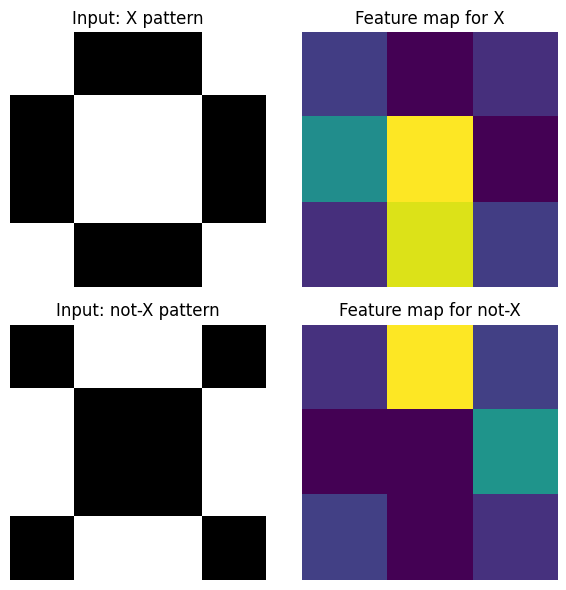

In [22]:
# ============================================================
# 2. CONVOLUTIONAL NEURAL NETWORK (CNN) DEMO
# ============================================================

class TinyCNN(nn.Module):
    def __init__(self):
        super().__init__()
        # One conv filter: kernel 2x2 → detects simple 2×2 patterns
        self.conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=2)
        # Output layer: flatten 3×3 feature map → 1 output
        self.fc = nn.Linear(3 * 3, 1)

    def forward(self, x, return_feature=False):
        # x shape: (B, 1, 4, 4)
        fmap = F.relu(self.conv(x))          # (B, 1, 3, 3)
        out = torch.sigmoid(self.fc(fmap.view(x.size(0), -1)))
        if return_feature:
            return out, fmap
        return out


def run_cnn_demo():
    print_header("CNN DEMO: Detecting an 'X' Pattern in a 4x4 Image")

    model = TinyCNN()

    # 4×4 "X" pattern
    X_pattern = torch.tensor([
        [1., 0., 0., 1.],
        [0., 1., 1., 0.],
        [0., 1., 1., 0.],
        [1., 0., 0., 1.]
    ])

    # 4×4 "not X" pattern
    NotX_pattern = torch.tensor([
        [0., 1., 1., 0.],
        [1., 0., 0., 1.],
        [1., 0., 0., 1.],
        [0., 1., 1., 0.]
    ])

    # Combine into batch with 1 channel
    imgs = torch.stack([X_pattern, NotX_pattern]).unsqueeze(1)  # (2,1,4,4)

    out, fmap = model(imgs, return_feature=True)

    print("Input images (X & not-X):")
    print(imgs.squeeze(1))

    print("\nFeature maps after 1 Conv + ReLU (batch x 1 x 3 x 3):")
    print(fmap)

    # ---- Visualization ----
    fig, axes = plt.subplots(2, 2, figsize=(6, 6))

    axes[0, 0].imshow(X_pattern.numpy(), cmap="gray", vmin=0, vmax=1)
    axes[0, 0].set_title("Input: X pattern")
    axes[0, 0].axis("off")

    axes[0, 1].imshow(fmap[0, 0].detach().numpy(), cmap="viridis")
    axes[0, 1].set_title("Feature map for X")
    axes[0, 1].axis("off")

    axes[1, 0].imshow(NotX_pattern.numpy(), cmap="gray", vmin=0, vmax=1)
    axes[1, 0].set_title("Input: not-X pattern")
    axes[1, 0].axis("off")

    axes[1, 1].imshow(fmap[1, 0].detach().numpy(), cmap="viridis")
    axes[1, 1].set_title("Feature map for not-X")
    axes[1, 1].axis("off")

    plt.tight_layout()
    plt.show()


# ============================================================
# Recall function (re-run + print output)
# ============================================================

def recall_cnn():
    print("\n🔁 Re-running CNN demo...\n")
    run_cnn_demo()


# You can run it immediately:
recall_cnn()


🔁 Re-running RNN demo...


RNN DEMO: Sentiment from Sequence of +/-1 Tokens

Input sequence: tensor([[ 1., -1.,  1.]])

Hidden states at each time step (T x H):
tensor([[ 0.3631, -0.7290],
        [-0.3083,  0.0215],
        [ 0.5101, -0.6448]], grad_fn=<SelectBackward0>)

Predicted sentiment (prob): 0.3811887800693512


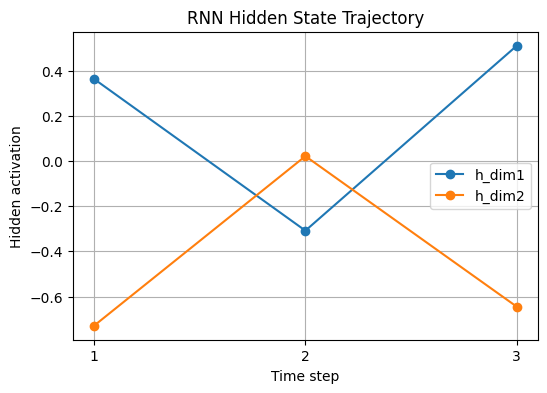

In [25]:
# ============================================================
# 3. SIMPLE RNN DEMO
# Input: sequence of +1/-1 tokens
# Representation: hidden state trajectory (2D)
# ============================================================

class TinyRNN(nn.Module):
    def __init__(self, hidden_size=2):
        super().__init__()
        self.rnn = nn.RNN(input_size=1, hidden_size=hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        # x shape: (B, T, 1)
        out, h_last = self.rnn(x)              # out: (B, T, H)
        y = torch.sigmoid(self.fc(h_last[0]))  # use final hidden state
        return y, out


def run_rnn_demo():
    print_header("RNN DEMO: Sentiment from Sequence of +/-1 Tokens")

    model = TinyRNN(hidden_size=2)

    # Example sequence: [+1, -1, +1]
    seq = torch.tensor([[+1.0, -1.0, +1.0]], dtype=torch.float32)
    seq = seq.unsqueeze(-1)  # (1, 3, 1)

    y, out = model(seq)
    hidden_traj = out[0]  # (T, H)

    print("Input sequence:", seq.squeeze(-1))
    print("\nHidden states at each time step (T x H):")
    print(hidden_traj)
    print("\nPredicted sentiment (prob):", y.item())

    # ---- Visualization ----
    T = hidden_traj.shape[0]
    t_axis = np.arange(1, T + 1)

    plt.figure()
    plt.plot(t_axis, hidden_traj[:, 0].detach().numpy(), marker='o', label='h_dim1')
    plt.plot(t_axis, hidden_traj[:, 1].detach().numpy(), marker='o', label='h_dim2')
    plt.xlabel("Time step")
    plt.ylabel("Hidden activation")
    plt.title("RNN Hidden State Trajectory")
    plt.legend()
    plt.xticks(t_axis)
    plt.show()


# ============================================================
# Recall function (individual re-run)
# ============================================================

def recall_rnn():
    print("\n🔁 Re-running RNN demo...\n")
    run_rnn_demo()


# Example run:
recall_rnn()



LSTM DEMO: Direct Visualization of Hidden & Cell States

Input encoded sequence: tensor([[ 0.,  0., -2.,  1.,  0.]])

Hidden states h_t over time: [-0.46148035 -0.5771097  -0.8104413  -0.46287543 -0.63208246]

Cell states c_t over time: [-0.7319587469100952, -1.218608021736145, -1.942180871963501, -1.3560823202133179, -1.5851668119430542]

Final prediction (prob): 0.417528361082077
Final cell state c_T: -1.5851668119430542


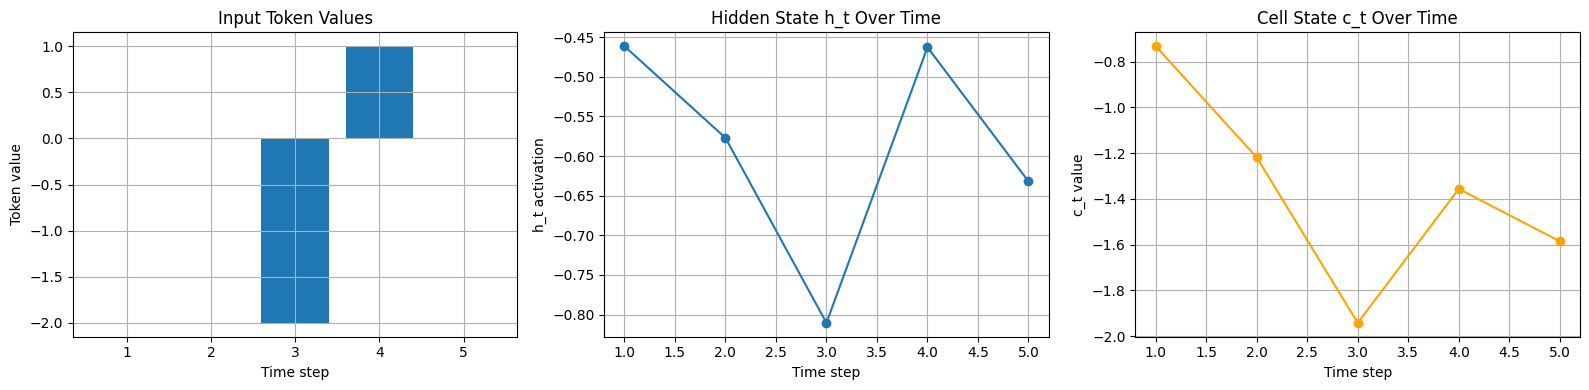

In [28]:
# ============================================================
# 4. LSTM DEMO (Direct Visualization of h_t and c_t)
# ============================================================

class TinyLSTM(nn.Module):
    def __init__(self, hidden_size=1):
        super().__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size=hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, (h_n, c_n) = self.lstm(x)
        y = torch.sigmoid(self.fc(h_n.squeeze(0)))
        return y, out, c_n


def run_lstm_demo():
    print_header('LSTM DEMO: Direct Visualization of Hidden & Cell States')

    model = TinyLSTM(hidden_size=1)

    # Encode tokens as values: I=0, do=0, not=-2, like=+1, this=0
    seq_vals = torch.tensor([[0.0, 0.0, -2.0, +1.0, 0.0]], dtype=torch.float32).unsqueeze(-1)

    # ---- Forward pass ----
    y, out, c_last = model(seq_vals)

    # Collect hidden states h_t
    h_vals = out[0, :, 0].detach().numpy()

    # To collect c_t per timestep, run step-by-step
    lstm = model.lstm
    h_t = torch.zeros(1, 1, 1)
    c_t = torch.zeros(1, 1, 1)
    c_vals = []

    for t in range(seq_vals.size(1)):
        out_t, (h_t, c_t) = lstm(seq_vals[:, t:t+1, :], (h_t, c_t))
        c_vals.append(c_t.item())

    # ---- Print Raw Outputs ----
    print("Input encoded sequence:", seq_vals.squeeze(-1))
    print("\nHidden states h_t over time:", h_vals)
    print("\nCell states c_t over time:", c_vals)
    print("\nFinal prediction (prob):", y.item())
    print("Final cell state c_T:", c_vals[-1])

    # ---- Visualization Panel ----
    T = len(h_vals)
    t_axis = np.arange(1, T + 1)

    fig, axes = plt.subplots(1, 3, figsize=(16, 4))

    # Token values
    axes[0].bar(t_axis, seq_vals.squeeze().numpy())
    axes[0].set_title("Input Token Values")
    axes[0].set_xlabel("Time step")
    axes[0].set_ylabel("Token value")

    # Hidden states
    axes[1].plot(t_axis, h_vals, marker='o')
    axes[1].set_title("Hidden State h_t Over Time")
    axes[1].set_xlabel("Time step")
    axes[1].set_ylabel("h_t activation")

    # Cell states
    axes[2].plot(t_axis, c_vals, marker='o', color='orange')
    axes[2].set_title("Cell State c_t Over Time")
    axes[2].set_xlabel("Time step")
    axes[2].set_ylabel("c_t value")

    plt.tight_layout()
    plt.show()


run_lstm_demo()



GRU DEMO: Smoothed Mood Over Chat Sequence

Input mood sequence: tensor([[ 1.,  1., -1.,  1.]])

GRU hidden h_t over time (smoothed mood):
[0.5445622  0.72267145 0.28782946 0.6358584 ]

Final predicted 'overall mood' (prob): 0.2786500155925751


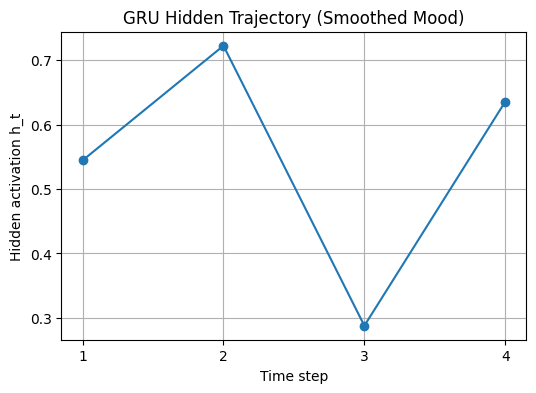

In [29]:
# ============================================================
# 5. GRU DEMO
# Input: chat mood sequence [-1..+1]
# Representation: single hidden state h_t (smoothed mood)
# ============================================================

class TinyGRU(nn.Module):
    def __init__(self, hidden_size=1):
        super().__init__()
        self.gru = nn.GRU(input_size=1, hidden_size=hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, h_n = self.gru(x)  # out: (B, T, H)
        y = torch.sigmoid(self.fc(h_n.squeeze(0)))
        return y, out


def run_gru_demo():
    print_header("GRU DEMO: Smoothed Mood Over Chat Sequence")

    model = TinyGRU(hidden_size=1)

    # Chat mood sequence: [+1, +1, -1, +1]
    seq = torch.tensor([[+1.0, +1.0, -1.0, +1.0]], dtype=torch.float32).unsqueeze(-1)  # (1,4,1)

    y, out = model(seq)
    hidden_traj = out[0, :, 0].detach().numpy()   # (T,)

    # ---- Print outputs ----
    print("Input mood sequence:", seq.squeeze(-1))
    print("\nGRU hidden h_t over time (smoothed mood):")
    print(hidden_traj)
    print("\nFinal predicted 'overall mood' (prob):", y.item())

    # ---- Visualization ----
    T = hidden_traj.shape[0]
    t_axis = np.arange(1, T + 1)

    plt.figure()
    plt.plot(t_axis, hidden_traj, marker='o')
    plt.xlabel("Time step")
    plt.ylabel("Hidden activation h_t")
    plt.title("GRU Hidden Trajectory (Smoothed Mood)")
    plt.xticks(t_axis)
    plt.show()


# ============================================================
# DIRECT VISUALIZATION CALL
# ============================================================

run_gru_demo()


TRANSFORMER DEMO: ['not', 'good', 'movie']

Raw embeddings:
tensor([[-1.0000,  0.0000],
        [ 0.8000,  0.6000],
        [ 0.1000,  0.2000]], grad_fn=<SelectBackward0>)

Attention (raw):
tensor([[[0.3559, 0.3266, 0.3175],
         [0.3263, 0.3328, 0.3409],
         [0.3347, 0.3321, 0.3332]]], grad_fn=<MeanBackward1>)

Attention (safe reshaped):
[[0.35588592 0.32658508 0.317529  ]
 [0.3263495  0.3327833  0.3408672 ]
 [0.33470234 0.3320977  0.33319995]]

Contextualized output:
tensor([[0.0317, 0.0552],
        [0.0351, 0.0590],
        [0.0342, 0.0581]], grad_fn=<SelectBackward0>)


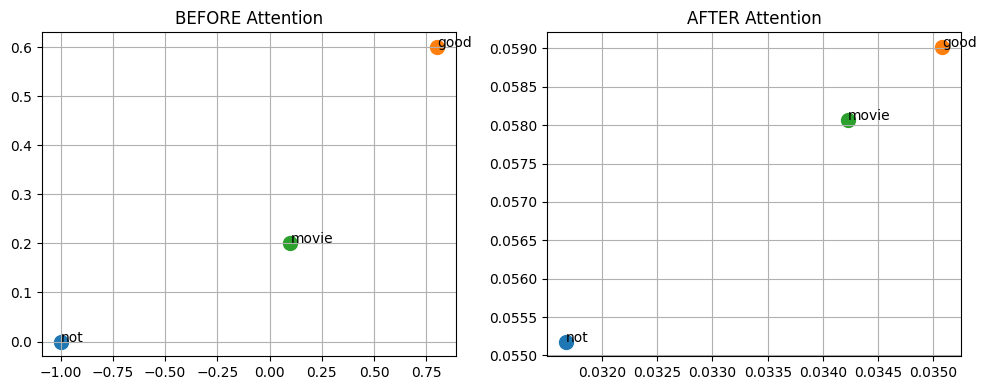

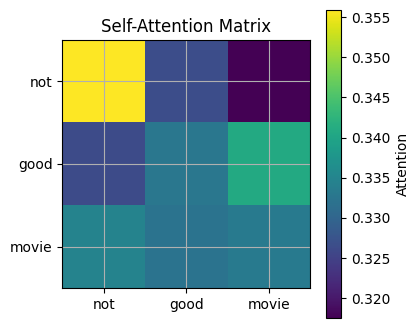

In [30]:
# ============================================================
# FINAL FIXED TRANSFORMER SELF-ATTENTION DEMO (NO SHAPE ERRORS)
# ============================================================

import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (6, 4)

def print_header(title):
    print("\n" + "=" * 70)
    print(title)
    print("=" * 70 + "\n")

# ------------------------------------------------------------
# Tiny Transformer Block
# ------------------------------------------------------------
class TinyTransformerBlock(nn.Module):
    def __init__(self, embed_dim=2, num_heads=1):
        super().__init__()
        self.attn = nn.MultiheadAttention(embed_dim=embed_dim, num_heads=num_heads, batch_first=True)
        self.linear = nn.Linear(embed_dim, embed_dim)

    def forward(self, x):
        attn_output, attn_weights = self.attn(x, x, x)
        out = self.linear(F.relu(attn_output))
        return out, attn_weights, attn_output

# ------------------------------------------------------------
# DEMO
# ------------------------------------------------------------
def run_transformer_demo():

    print_header("TRANSFORMER DEMO: ['not', 'good', 'movie']")

    vocab = {"not": 0, "good": 1, "movie": 2}
    embed_dim = 2

    embedding = nn.Embedding(3, embed_dim)
    with torch.no_grad():
        embedding.weight.data = torch.tensor([
            [-1.0,  0.0],   # not
            [ 0.8,  0.6],   # good
            [ 0.1,  0.2],   # movie
        ])

    model = TinyTransformerBlock(embed_dim=embed_dim)

    # Input tokens
    token_ids = torch.tensor([[vocab["not"], vocab["good"], vocab["movie"]]])
    x_emb = embedding(token_ids)

    print("Raw embeddings:")
    print(x_emb[0])

    out, attn_weights, attn_output = model(x_emb)

    print("\nAttention (raw):")
    print(attn_weights)

    # --------------------------------------------------------
    # SAFETY FIX: make sure attn_weights is ALWAYS (3,3)
    # --------------------------------------------------------
    w = attn_weights.squeeze()
    if w.ndim == 1:
        # if PyTorch collapses to shape (3,), reshape manually
        w = w.reshape(1, 3)       # but attention is always square!
    if w.ndim == 2 and w.shape[0] != w.shape[1]:
        # enforce square matrix
        size = w.shape[1]
        w = w.reshape(size, size)
    w = w.detach().numpy()

    print("\nAttention (safe reshaped):")
    print(w)

    print("\nContextualized output:")
    print(attn_output[0])

    # --------------------------------------------------------
    # Visualize embeddings before and after (scatter, NEVER imshow)
    # --------------------------------------------------------
    tokens = ["not", "good", "movie"]

    emb_before = x_emb[0].detach().numpy()
    emb_after = attn_output[0].detach().numpy()

    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    axes[0].set_title("BEFORE Attention")
    for i, tok in enumerate(tokens):
        axes[0].scatter(emb_before[i,0], emb_before[i,1], s=100)
        axes[0].annotate(tok, (emb_before[i,0], emb_before[i,1]))

    axes[1].set_title("AFTER Attention")
    for i, tok in enumerate(tokens):
        axes[1].scatter(emb_after[i,0], emb_after[i,1], s=100)
        axes[1].annotate(tok, (emb_after[i,0], emb_after[i,1]))

    plt.tight_layout()
    plt.show()

    # --------------------------------------------------------
    # Attention heatmap (THIS IS THE ONLY VALID imshow)
    # --------------------------------------------------------
    plt.figure(figsize=(4, 4))
    plt.imshow(w, cmap="viridis")
    plt.colorbar(label="Attention")
    plt.xticks(range(3), tokens)
    plt.yticks(range(3), tokens)
    plt.title("Self-Attention Matrix")
    plt.show()

# ------------------------------------------------------------
# RUN
# ------------------------------------------------------------
run_transformer_demo()



CNN DEMO ON CIFAR-10

Ground truth label: dog
Predicted: ship


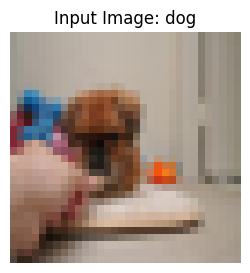

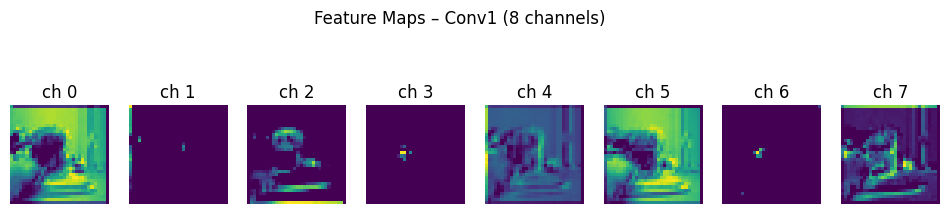

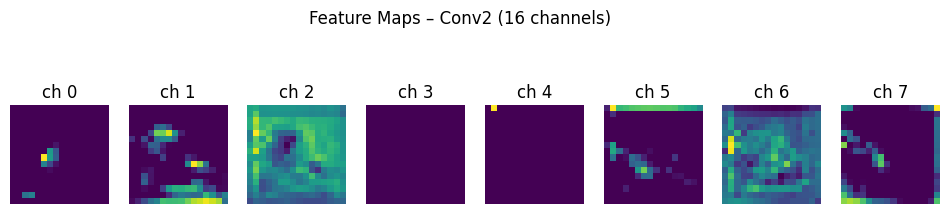

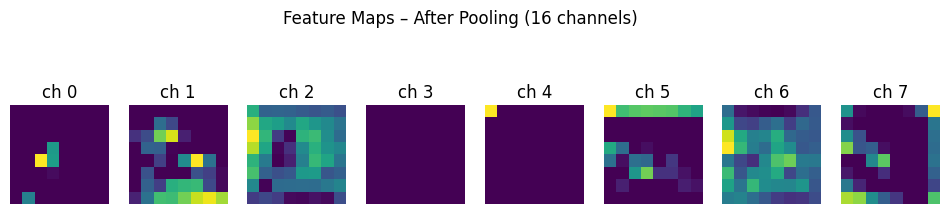

In [32]:
# ============================================================
# CNN DEMO ON CIFAR-10 (REAL IMAGE DATA)
# Visualizes feature maps of a TinyCNN
# ============================================================

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (6,4)

def print_header(title):
    print("\n" + "="*70)
    print(title)
    print("="*70 + "\n")


# ------------------------------------------------------------
# Tiny CNN for CIFAR-10 (3x32x32 images)
# ------------------------------------------------------------
class TinyCIFARCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 8, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(8, 16, kernel_size=3, padding=1)
        self.fc = nn.Linear(16 * 8 * 8, 10)

    def forward(self, x, return_features=False):
        f1 = F.relu(self.conv1(x))   # (B,8,32,32)
        f2 = F.relu(self.conv2(F.max_pool2d(f1, 2)))  # (B,16,16,16)
        f3 = F.max_pool2d(f2, 2)     # (B,16,8,8)
        out = self.fc(f3.view(x.size(0), -1))
        if return_features:
            return out, f1, f2, f3
        return out


# ------------------------------------------------------------
# DEMO FUNCTION
# ------------------------------------------------------------
def run_cnn_cifar10_demo():

    print_header("CNN DEMO ON CIFAR-10")

    # --------------------------------------------------------
    # Load CIFAR-10
    # --------------------------------------------------------
    transform = transforms.Compose([
        transforms.ToTensor()
    ])

    testset = torchvision.datasets.CIFAR10(
        root='./data', train=False, download=True, transform=transform)

    testloader = torch.utils.data.DataLoader(testset, batch_size=1, shuffle=True)

    # Get one image
    data_iter = iter(testloader)
    img, label = next(data_iter)

    # Class names
    classes = ["airplane","automobile","bird","cat","deer",
               "dog","frog","horse","ship","truck"]

    print(f"Ground truth label: {classes[label.item()]}")

    # --------------------------------------------------------
    # Model
    # --------------------------------------------------------
    model = TinyCIFARCNN()
    out, f1, f2, f3 = model(img, return_features=True)

    pred = torch.argmax(out).item()
    print(f"Predicted: {classes[pred]}")

    # --------------------------------------------------------
    # Visualize original image
    # --------------------------------------------------------
    plt.figure(figsize=(3,3))
    plt.imshow(img[0].permute(1,2,0))
    plt.title(f"Input Image: {classes[label.item()]}")
    plt.axis("off")
    plt.show()

    # --------------------------------------------------------
    # Visualize feature maps
    # --------------------------------------------------------

    def show_feature_maps(fmap, title, limit=8):
        fmap = fmap[0].detach().numpy()
        channels = fmap.shape[0]

        plt.figure(figsize=(12, 3))
        for i in range(min(channels, limit)):
            plt.subplot(1, limit, i+1)
            plt.imshow(fmap[i], cmap="viridis")
            plt.title(f"ch {i}")
            plt.axis("off")
        plt.suptitle(title)
        plt.show()

    show_feature_maps(f1, "Feature Maps – Conv1 (8 channels)")
    show_feature_maps(f2, "Feature Maps – Conv2 (16 channels)")
    show_feature_maps(f3, "Feature Maps – After Pooling (16 channels)")


# ------------------------------------------------------------
# RUN DIRECTLY
# ------------------------------------------------------------
run_cnn_cifar10_demo()


CNN REPRESENTATION DEMO on CIFAR-10

Class: cat


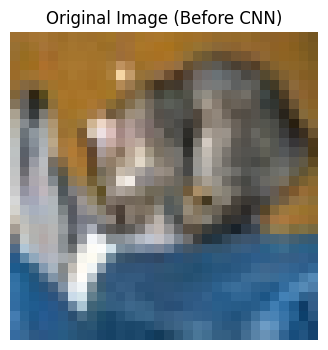

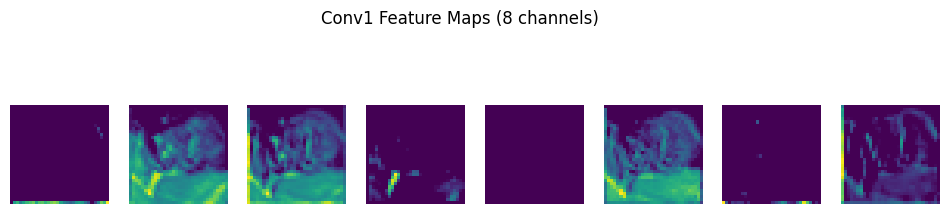

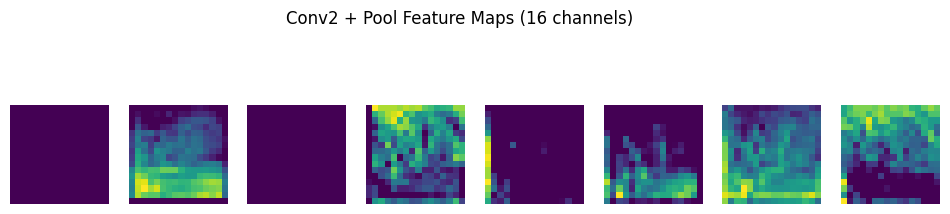

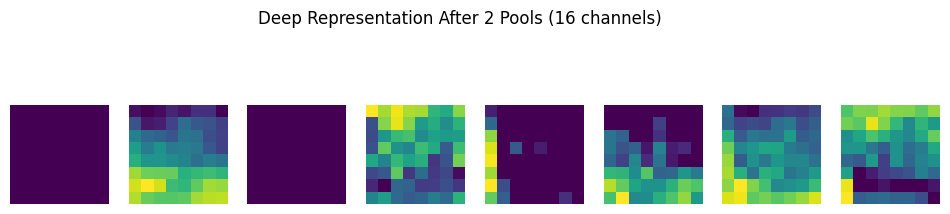

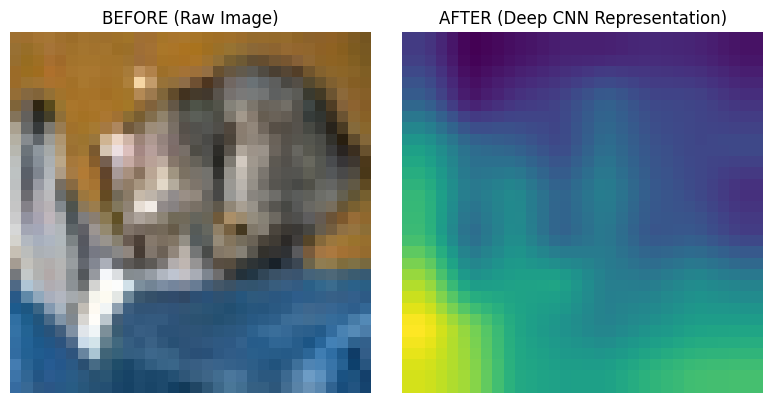

In [33]:
# ============================================================
# CIFAR-10 CNN DEMO — BEFORE & AFTER VISUALIZING REPRESENTATIONS
# ============================================================

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = (6,4)

def print_header(title):
    print("\n" + "="*70)
    print(title)
    print("="*70 + "\n")


# ------------------------------------------------------------
# Tiny CNN for CIFAR-10
# ------------------------------------------------------------
class TinyCIFARCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 8, 3, padding=1)
        self.conv2 = nn.Conv2d(8, 16, 3, padding=1)

    def forward(self, x):
        f1 = F.relu(self.conv1(x))                    # (B,8,32,32)
        f2 = F.relu(self.conv2(F.max_pool2d(f1, 2)))  # (B,16,16,16)
        f3 = F.max_pool2d(f2, 2)                      # (B,16,8,8)
        return f1, f2, f3


# ------------------------------------------------------------
# Visualization Helper
# ------------------------------------------------------------
def show_feature_grid(features, title, limit=8):
    fmap = features[0].detach().cpu().numpy()
    C = fmap.shape[0]

    plt.figure(figsize=(12, 3))
    for i in range(min(C, limit)):
        plt.subplot(1, limit, i+1)
        plt.imshow(fmap[i], cmap="viridis")
        plt.axis("off")
    plt.suptitle(title)
    plt.show()


def upscale_representation(rep):
    """Upscale deep representation to image size so student can compare 'before vs after'."""
    rep = rep.mean(dim=1, keepdim=True)                     # (1,1,H,W)
    rep = F.interpolate(rep, size=(32,32), mode='bilinear') # back to 32×32
    return rep[0,0].detach().numpy()


# ------------------------------------------------------------
# DEMO FUNCTION
# ------------------------------------------------------------
def run_cnn_cifar10_demo():

    print_header("CNN REPRESENTATION DEMO on CIFAR-10")

    # --------------------------------------------------------
    # Load sample CIFAR-10 image
    # --------------------------------------------------------
    transform = transforms.Compose([transforms.ToTensor()])
    testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
    img, label = testset[0]
    img_batch = img.unsqueeze(0)

    classes = ["airplane","automobile","bird","cat","deer",
               "dog","frog","horse","ship","truck"]

    print("Class:", classes[label])

    # --------------------------------------------------------
    # Run through TinyCNN
    # --------------------------------------------------------
    model = TinyCIFARCNN()
    f1, f2, f3 = model(img_batch)

    # --------------------------------------------------------
    # 1. Show ORIGINAL IMAGE
    # --------------------------------------------------------
    plt.figure(figsize=(4,4))
    plt.imshow(img.permute(1,2,0))
    plt.title("Original Image (Before CNN)")
    plt.axis("off")
    plt.show()

    # --------------------------------------------------------
    # 2. Show FEATURE MAPS
    # --------------------------------------------------------
    show_feature_grid(f1, "Conv1 Feature Maps (8 channels)")
    show_feature_grid(f2, "Conv2 + Pool Feature Maps (16 channels)")
    show_feature_grid(f3, "Deep Representation After 2 Pools (16 channels)")

    # --------------------------------------------------------
    # 3. BEFORE vs AFTER (Deep Rep Upscaled)
    # --------------------------------------------------------
    deep_rep = upscale_representation(f3)  # shape (32,32)

    plt.figure(figsize=(8,4))

    # Before
    plt.subplot(1,2,1)
    plt.imshow(img.permute(1,2,0))
    plt.title("BEFORE (Raw Image)")
    plt.axis("off")

    # After
    plt.subplot(1,2,2)
    plt.imshow(deep_rep, cmap="viridis")
    plt.title("AFTER (Deep CNN Representation)")
    plt.axis("off")

    plt.tight_layout()
    plt.show()


# ------------------------------------------------------------
# RUN DEMO
# ------------------------------------------------------------
run_cnn_cifar10_demo()


CIFAR-10 CNN REPRESENTATION VISUALIZER PROJECT

Selected Image Class: cat



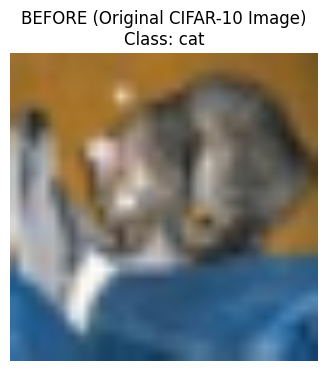

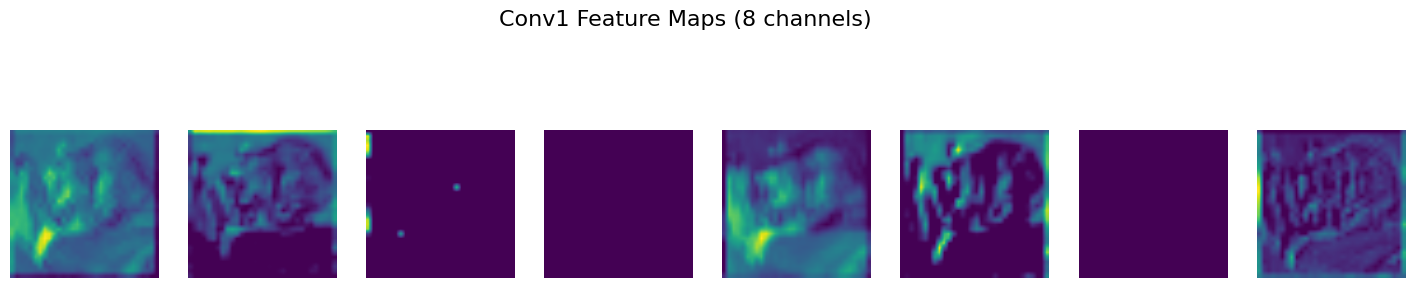

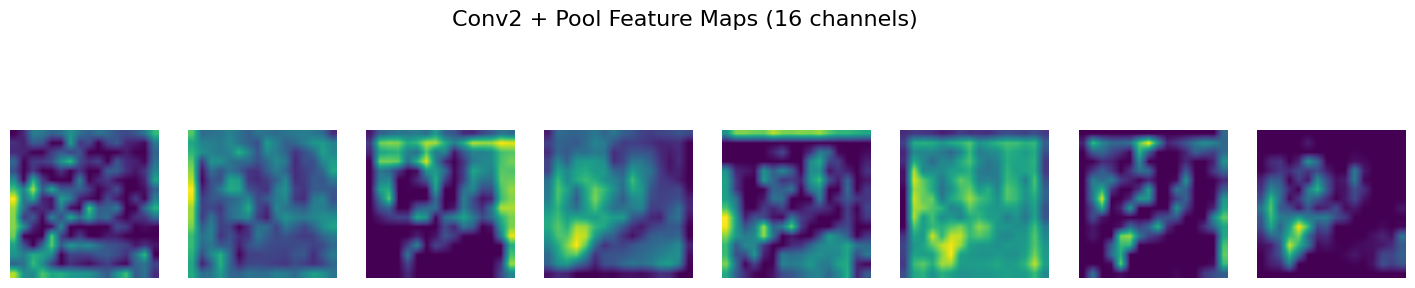

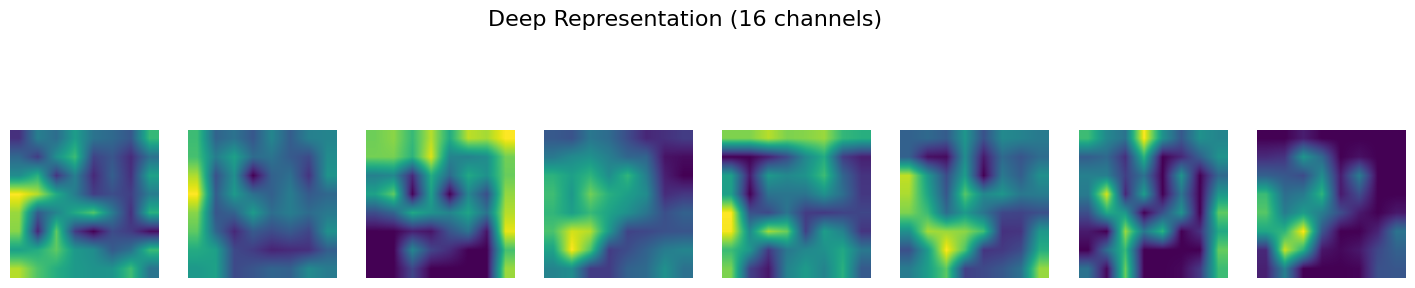

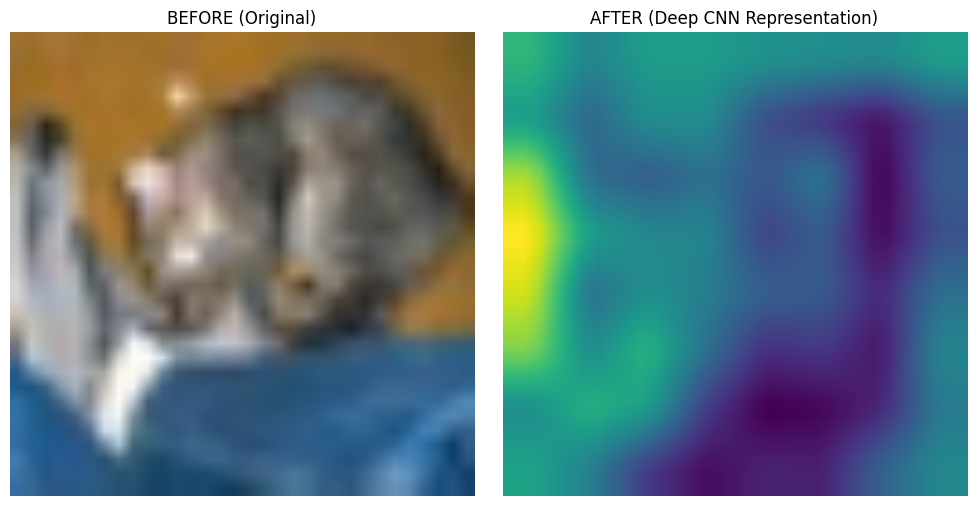

In [34]:
# ============================================================
# CIFAR-10 CNN REPRESENTATION VISUALIZER (ONE-CELL PROJECT)
# ============================================================

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = (6,4)

def print_header(title):
    print("\n" + "="*80)
    print(title)
    print("="*80 + "\n")


# ------------------------------------------------------------
# 1. Tiny CNN Model for CIFAR-10
# ------------------------------------------------------------
class TinyCIFARCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 8, 3, padding=1)   # → (8, 32, 32)
        self.conv2 = nn.Conv2d(8, 16, 3, padding=1)  # → (16, 16, 16)

    def forward(self, x):
        f1 = F.relu(self.conv1(x))                     # Conv1 output
        f2 = F.relu(self.conv2(F.max_pool2d(f1, 2)))   # Conv2 output
        f3 = F.max_pool2d(f2, 2)                       # Deep representation
        return f1, f2, f3


# ------------------------------------------------------------
# 2. Helper Functions
# ------------------------------------------------------------
def upscale_representation(rep):
    """Upscale deep rep (16×8×8) → (32×32) for clean visualization."""
    rep = rep.mean(dim=1, keepdim=True)             # → (1,1,H,W)
    rep = F.interpolate(rep, size=(32, 32), mode='bilinear')
    return rep[0,0].detach().numpy()


def show_feature_maps(f, title, limit=8):
    """Show first N feature maps clearly (smooth interpolation)."""
    fmap = f[0].detach().cpu().numpy()
    C = fmap.shape[0]

    plt.figure(figsize=(18, 4))
    for i in range(min(C, limit)):
        plt.subplot(1, limit, i+1)
        plt.imshow(fmap[i], cmap="viridis", interpolation="bilinear")
        plt.axis("off")
    plt.suptitle(title, fontsize=16)
    plt.show()


# ------------------------------------------------------------
# 3. MAIN DEMO PROJECT
# ------------------------------------------------------------
def run_cifar10_cnn_project():

    print_header("CIFAR-10 CNN REPRESENTATION VISUALIZER PROJECT")

    # Load CIFAR-10
    transform = transforms.Compose([transforms.ToTensor()])
    testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                           download=True, transform=transform)

    # Select one sample
    img, label = testset[0]
    img_b = img.unsqueeze(0)

    classes = ["airplane","automobile","bird","cat","deer",
               "dog","frog","horse","ship","truck"]

    print(f"Selected Image Class: {classes[label]}\n")

    # Run CNN
    model = TinyCIFARCNN()
    f1, f2, f3 = model(img_b)

    # ------------------------------------------------------------
    # BEFORE VISUALIZATION — Clear High-Res Image
    # ------------------------------------------------------------
    plt.figure(figsize=(4,4))
    plt.imshow(img.permute(1,2,0), interpolation='bilinear')
    plt.title(f"BEFORE (Original CIFAR-10 Image)\nClass: {classes[label]}")
    plt.axis("off")
    plt.show()

    # ------------------------------------------------------------
    # FEATURE MAP VISUALIZATION
    # ------------------------------------------------------------
    show_feature_maps(f1, "Conv1 Feature Maps (8 channels)")
    show_feature_maps(f2, "Conv2 + Pool Feature Maps (16 channels)")
    show_feature_maps(f3, "Deep Representation (16 channels)")

    # ------------------------------------------------------------
    # AFTER VISUALIZATION — Deep Representation Upscaled
    # ------------------------------------------------------------
    deep_rep = upscale_representation(f3)

    plt.figure(figsize=(10,5))

    # Before
    plt.subplot(1,2,1)
    plt.imshow(img.permute(1,2,0), interpolation='bilinear')
    plt.title("BEFORE (Original)")
    plt.axis("off")

    # After
    plt.subplot(1,2,2)
    plt.imshow(deep_rep, cmap="viridis", interpolation='bilinear')
    plt.title("AFTER (Deep CNN Representation)")
    plt.axis("off")

    plt.tight_layout()
    plt.show()


# ------------------------------------------------------------
# RUN PROJECT
# ------------------------------------------------------------
run_cifar10_cnn_project()


FASHION-MNIST CNN REPRESENTATION VISUALIZER PROJECT



100%|██████████| 26.4M/26.4M [00:02<00:00, 12.1MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 185kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.59MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 20.4MB/s]

Selected Image Class: Ankle Boot



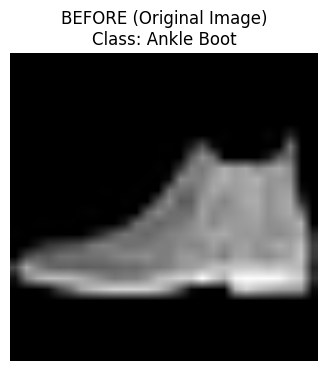

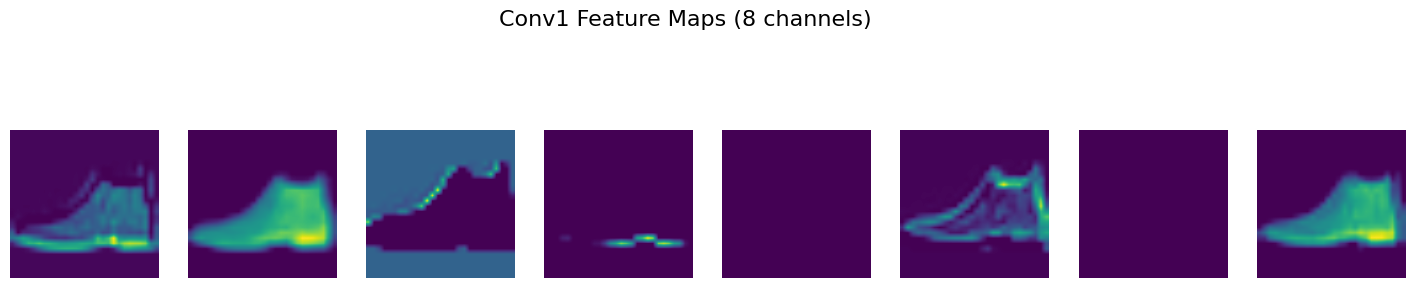

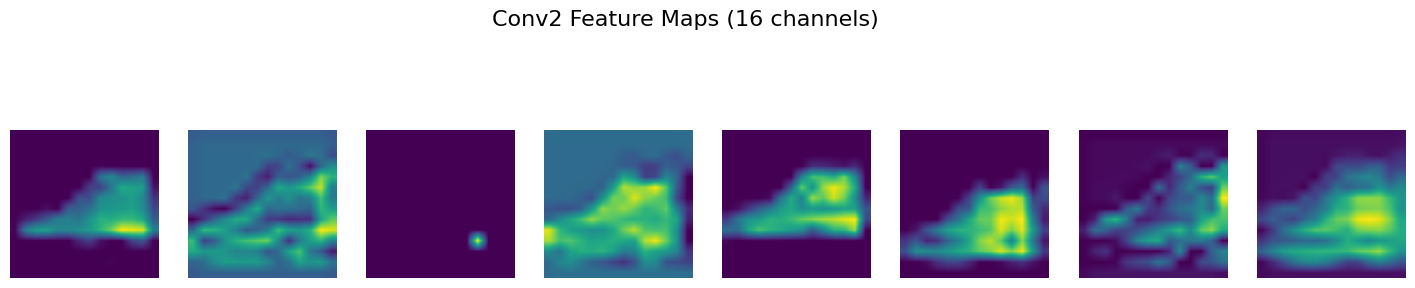

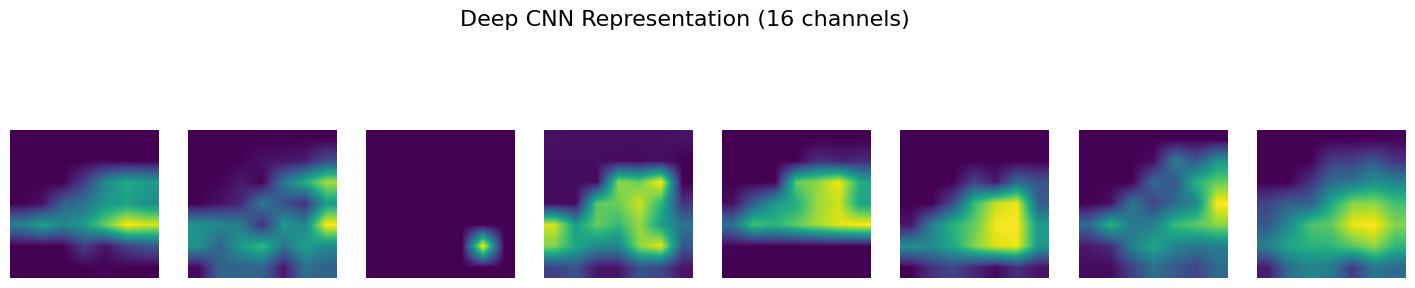

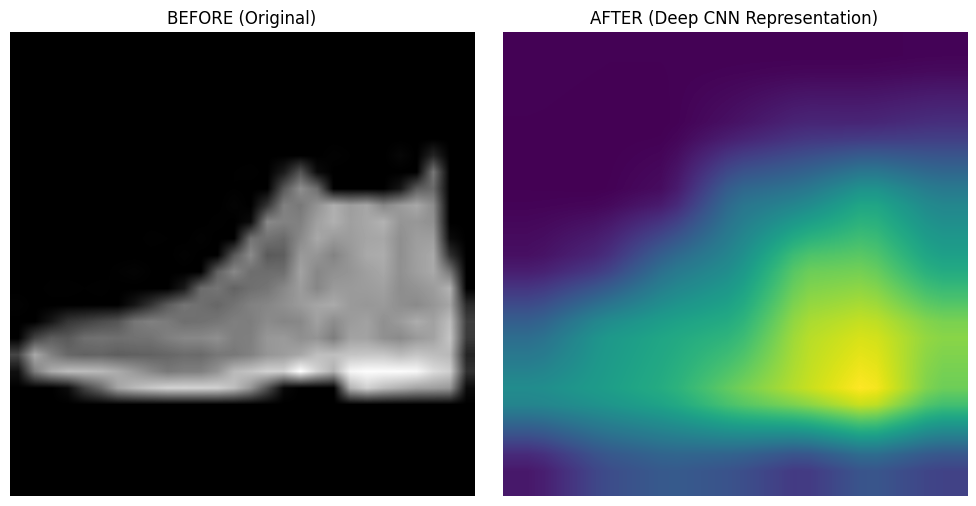

In [35]:
# ============================================================
# FASHION-MNIST CNN REPRESENTATION VISUALIZER (ONE-CELL PROJECT)
# ============================================================

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = (6,4)

def print_header(title):
    print("\n" + "="*80)
    print(title)
    print("="*80 + "\n")


# ------------------------------------------------------------
# 1. Tiny CNN for Fashion-MNIST
# ------------------------------------------------------------
class TinyFMNISTCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 8, 3, padding=1)    # 1→8 channels, 28×28
        self.conv2 = nn.Conv2d(8, 16, 3, padding=1)   # 8→16 channels, 14×14

    def forward(self, x):
        f1 = F.relu(self.conv1(x))                    # (8, 28, 28)
        f2 = F.relu(self.conv2(F.max_pool2d(f1, 2)))  # (16, 14, 14)
        f3 = F.max_pool2d(f2, 2)                      # (16, 7, 7)
        return f1, f2, f3


# ------------------------------------------------------------
# 2. Visualization Helpers
# ------------------------------------------------------------
def upscale_representation(rep):
    """Upscale deep feature rep (7×7) → 28×28 for human-friendly view."""
    rep = rep.mean(dim=1, keepdim=True)                     # (1,1,H,W)
    rep = F.interpolate(rep, size=(28, 28), mode='bilinear')
    return rep[0,0].detach().numpy()


def show_feature_maps(f, title, limit=8):
    fmap = f[0].detach().cpu().numpy()
    C = fmap.shape[0]

    plt.figure(figsize=(18, 4))
    for i in range(min(C, limit)):
        plt.subplot(1, limit, i+1)
        plt.imshow(fmap[i], cmap="viridis", interpolation="bilinear")
        plt.axis("off")
    plt.suptitle(title, fontsize=16)
    plt.show()


# ------------------------------------------------------------
# 3. MAIN PROJECT
# ------------------------------------------------------------
def run_fashionmnist_cnn_project():

    print_header("FASHION-MNIST CNN REPRESENTATION VISUALIZER PROJECT")

    # Load Fashion-MNIST
    transform = transforms.Compose([transforms.ToTensor()])
    testset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                                download=True, transform=transform)

    img, label = testset[0]
    img_b = img.unsqueeze(0)

    classes = [
        "T-Shirt/top", "Trouser", "Pullover", "Dress", "Coat",
        "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"
    ]

    print(f"Selected Image Class: {classes[label]}\n")

    # Run CNN
    model = TinyFMNISTCNN()
    f1, f2, f3 = model(img_b)

    # ------------------------------------------------------------
    # BEFORE — Clear visualization of Fashion-MNIST image
    # ------------------------------------------------------------
    plt.figure(figsize=(4,4))
    plt.imshow(img.squeeze(), cmap='gray', interpolation='bilinear')
    plt.title(f"BEFORE (Original Image)\nClass: {classes[label]}")
    plt.axis("off")
    plt.show()

    # ------------------------------------------------------------
    # FEATURE MAPS
    # ------------------------------------------------------------
    show_feature_maps(f1, "Conv1 Feature Maps (8 channels)")
    show_feature_maps(f2, "Conv2 Feature Maps (16 channels)")
    show_feature_maps(f3, "Deep CNN Representation (16 channels)")

    # ------------------------------------------------------------
    # AFTER — Deep representation upscaled to image size
    # ------------------------------------------------------------
    deep_rep = upscale_representation(f3)

    plt.figure(figsize=(10,5))

    # Before
    plt.subplot(1,2,1)
    plt.imshow(img.squeeze(), cmap='gray', interpolation='bilinear')
    plt.title("BEFORE (Original)")
    plt.axis("off")

    # After
    plt.subplot(1,2,2)
    plt.imshow(deep_rep, cmap="viridis", interpolation='bilinear')
    plt.title("AFTER (Deep CNN Representation)")
    plt.axis("off")

    plt.tight_layout()
    plt.show()


# ------------------------------------------------------------
# RUN PROJECT
# ------------------------------------------------------------
run_fashionmnist_cnn_project()

👉 Upload any image from your computer:


Saving download (1).jpg to download (1).jpg


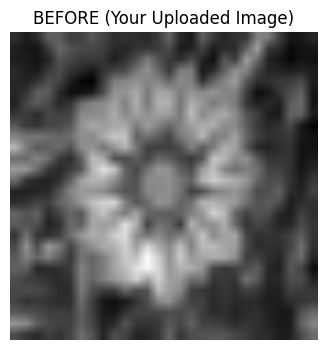

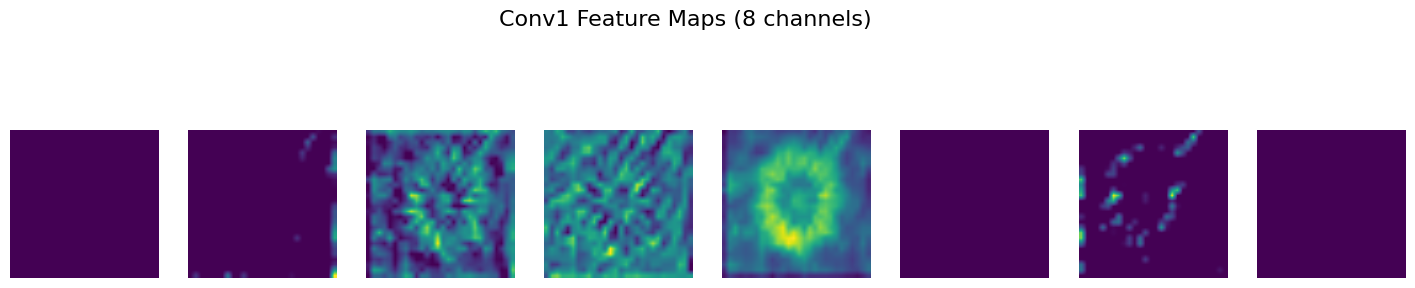

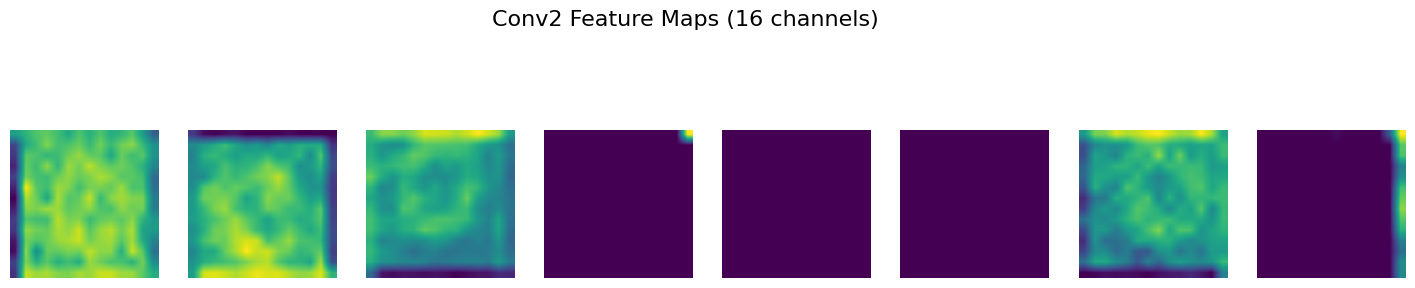

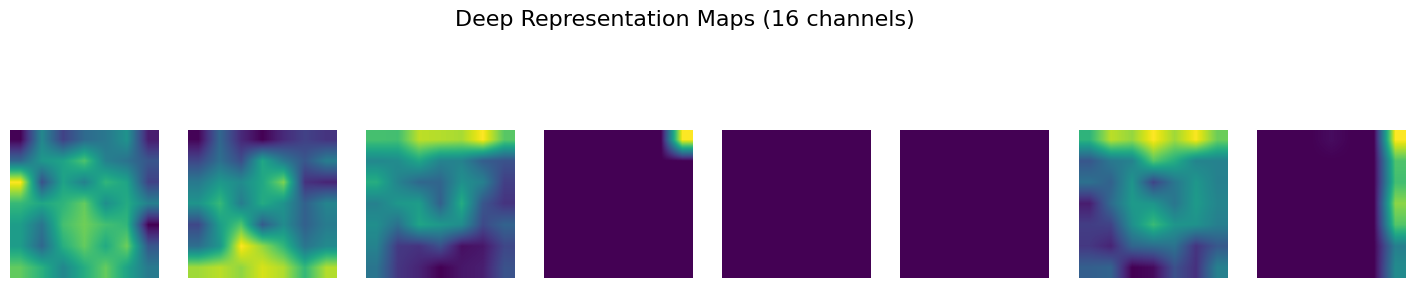

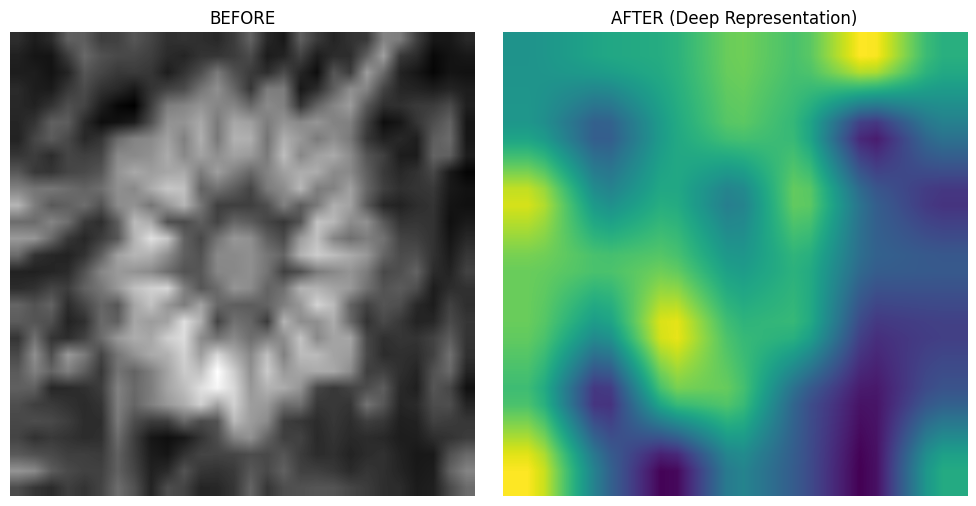

In [36]:
# ============================================================
# UPLOAD YOUR OWN IMAGE + APPLY FASHION-MNIST CNN REPRESENTATIONS
# ============================================================

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

from google.colab import files
plt.rcParams['figure.figsize'] = (6,4)

# ------------------------------------------------------------
# 1. Tiny CNN (same architecture as before)
# ------------------------------------------------------------
class TinyFMNISTCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 8, 3, padding=1)
        self.conv2 = nn.Conv2d(8, 16, 3, padding=1)

    def forward(self, x):
        f1 = F.relu(self.conv1(x))                    # (8, 28, 28)
        f2 = F.relu(self.conv2(F.max_pool2d(f1, 2)))  # (16, 14, 14)
        f3 = F.max_pool2d(f2, 2)                      # (16, 7, 7)
        return f1, f2, f3


# ------------------------------------------------------------
# 2. Helper visualization functions
# ------------------------------------------------------------
def upscale_representation(rep):
    rep = rep.mean(dim=1, keepdim=True)
    rep = F.interpolate(rep, size=(28, 28), mode='bilinear')
    return rep[0,0].detach().numpy()

def show_feature_maps(f, title, limit=8):
    fmap = f[0].detach().cpu().numpy()
    C = fmap.shape[0]

    plt.figure(figsize=(18, 4))
    for i in range(min(C, limit)):
        plt.subplot(1, limit, i+1)
        plt.imshow(fmap[i], cmap="viridis", interpolation="bilinear")
        plt.axis("off")
    plt.suptitle(title, fontsize=16)
    plt.show()


# ------------------------------------------------------------
# 3. UPLOAD IMAGE FROM YOUR LAPTOP
# ------------------------------------------------------------
print("👉 Upload any image from your computer:")
uploaded = files.upload()

fname = next(iter(uploaded.keys()))
img = Image.open(fname).convert("L")   # convert to grayscale

# Resize to 28×28 (Fashion-MNIST size)
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((28, 28)),
    transforms.ToTensor()
])

img_t = transform(img)
img_b = img_t.unsqueeze(0)

# ------------------------------------------------------------
# 4. Run CNN on your custom image
# ------------------------------------------------------------
model = TinyFMNISTCNN()
f1, f2, f3 = model(img_b)


# ------------------------------------------------------------
# 5. Visualize BEFORE (Your Image)
# ------------------------------------------------------------
plt.figure(figsize=(4,4))
plt.imshow(img_t.squeeze(), cmap='gray', interpolation='bilinear')
plt.title("BEFORE (Your Uploaded Image)")
plt.axis("off")
plt.show()


# ------------------------------------------------------------
# 6. Visualize Feature Maps
# ------------------------------------------------------------
show_feature_maps(f1, "Conv1 Feature Maps (8 channels)")
show_feature_maps(f2, "Conv2 Feature Maps (16 channels)")
show_feature_maps(f3, "Deep Representation Maps (16 channels)")


# ------------------------------------------------------------
# 7. AFTER (Deep Representation) — Upscaled
# ------------------------------------------------------------
deep_rep = upscale_representation(f3)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(img_t.squeeze(), cmap='gray', interpolation='bilinear')
plt.title("BEFORE")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(deep_rep, cmap="viridis", interpolation='bilinear')
plt.title("AFTER (Deep Representation)")
plt.axis("off")

plt.tight_layout()
plt.show()